# Given details

### Attribute Information : -

1. **Age**: age of the patient [years]
2. **Sex**: sex of the patient [M: Male, F: Female]
3. **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. **RestingBP**: resting blood pressure [mm Hg]
5. **Cholesterol**: serum cholesterol [mm/dl]
6. **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
9. **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
10. **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
11. **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **HeartDisease**: output class [1: heart disease, 0: Normal]

### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

## Import all necessary modules

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

## Loading the dataset from csv file

In [11]:
dataset = pd.read_csv('heart.csv')
# print(dataset)
print(dataset.dtypes)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


## Data cleaning

1. First delete all duplicate rows.

In [12]:
print("Before duplicates were removed, no of rows = ", len(dataset), "\n")
dataset = dataset.drop_duplicates()

print("\nAfter duplicates were removed, no of rows = ", len(dataset))

Before duplicates were removed, no of rows =  918 


After duplicates were removed, no of rows =  918


2. Remove all null values if any(delete those rows)

In [13]:
dataset.isnull().sum() # no null values
# dataset.dropna()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##  Processing

All non numerical data are to converted to numerical.

1. For gender M -> 1 and F -> 2

2. Chest Pain type    ASY->1 , ATA->2, NAP->3, TA->4

3. RestingECG   'LVH' -> 1, 'Normal' -> 0 , 'ST' -> -1

4. ExerciseAngina  Y->1 and N -> 0

5. ST_Slope   'Up' = 1, 'Down' = -1, 'Flat' = 0

In [17]:
# dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 2})

# dataset['ChestPainType'] = dataset['ChestPainType'].replace({'ASY':1, 'ATA':2, 'NAP':3, 'TA':4})

# dataset['RestingECG'] = dataset['RestingECG'].replace({'LVH' : 1, 'Normal' : 0 , 'ST' : -1})

# dataset['ExerciseAngina'] = dataset['ExerciseAngina'].replace({'Y' : 1, 'N' : 0})

# dataset['ST_Slope'] = dataset['ST_Slope'].replace({'Up':1, 'Down':-1, 'Flat':0});

le=LabelEncoder()

dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['ChestPainType']=le.fit_transform(dataset['ChestPainType'])
dataset['RestingECG']=le.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina']=le.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope']=le.fit_transform(dataset['ST_Slope'])


## Checking if all columns are numerical or not

In [18]:
dataset.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

## First split data in X and Y (independent & dependent varibles)  

output variable heart disease contains only binary values of 0 and 1, then it should be treated as a binary classification problem. You can confirm this by checking the unique values in the heart disease column of your dataset using the unique() method:

print(df['heart disease'].unique())

If the output is an array containing only 0 and 1, then you can consider it as a binary classification problem.

In [30]:
X = dataset.iloc[: ,:-1].values # avoidng last column heart disease
Y = dataset.iloc[:, -1].values # dependent attribute is the disease

# split data into training and testing sets 80 - 20 size
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train, y_train, X_test, y_test, sep="\n\n")


[[42.   1.   2.  ...  0.   0.8  0. ]
 [36.   1.   2.  ...  0.   0.   2. ]
 [56.   1.   0.  ...  1.   1.   1. ]
 ...
 [60.   1.   0.  ...  1.   1.4  2. ]
 [60.   1.   0.  ...  1.   0.   2. ]
 [40.   0.   0.  ...  0.   2.   1. ]]

[0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 

## Train the model based on linear regression

To convert the continuous predictions to binary, you can use a threshold value, typically 0.5. If the predicted value is greater than or equal to 0.5, you can classify it as 1 (presence of heart disease) and if it is less than 0.5, you can classify it as 0 (absence of heart disease).

In [31]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Evaluate the model using metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_binary))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_binary))
print('R-squared score:', r2_score(y_test, y_pred_binary))

print("Accuracy in percentage : {:.3f} % ".format( accuracy_score(y_test, y_pred_binary) * 100 )  )

Mean Squared Error: 0.16304347826086957
Mean Absolute Error: 0.16304347826086957
R-squared score: 0.3300157786139095
Accuracy in percentage : 83.696 % 


## Train model based on RandomForestRegression

In [32]:
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
# make predictions
y_pred2 = model.predict(X_test)
threshold = 0.5
y_pred2_binary = (y_pred2 >= threshold).astype(int)

# evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2_binary))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2_binary))
print('R-squared score:', r2_score(y_test, y_pred2_binary))

print("Accuracy in percentage : {:.3f} % ".format( accuracy_score(y_test, y_pred2_binary) * 100 )  )

Mean Squared Error: 0.14130434782608695
Mean Absolute Error: 0.14130434782608695
R-squared score: 0.41934700813205494
Accuracy in percentage : 85.870 % 


## use XGBRegressor

imports done below

In [33]:
# import xgboost
import xgboost as xgb

# fit the model
model = xgb.XGBRegressor(random_state=1)
model.fit(X_train, y_train)

# make predictions
y_pred3 = model.predict(X_test)
threshold = 0.5
y_pred3_binary = (y_pred3 >= threshold).astype(int)

# evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred3_binary))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3_binary))
print('R-squared score:', r2_score(y_test, y_pred3_binary))

print("Accuracy in percentage : {:.3f} % ".format( accuracy_score(y_test, y_pred3_binary) * 100 )  )


Mean Squared Error: 0.16847826086956522
Mean Absolute Error: 0.16847826086956522
R-squared score: 0.30768297123437316
Accuracy in percentage : 83.152 % 


## MLP Regressor

imports done below

In [34]:
from sklearn.neural_network import MLPRegressor

# create the model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=1)

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

# convert predictions to binary values
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy*100))


Mean Squared Error: 0.2562399337705017
Mean Absolute Error: 0.40031240804924945
R-squared score: -0.0529505034268849
Accuracy: 67.39%


## Neural Network Regressor

In [35]:
from sklearn.neural_network import MLPRegressor

# initialize the model with desired hyperparameters
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)


# evaluate the performance of the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy*100))

Mean Squared Error: 0.18758415355941593
Mean Absolute Error: 0.3370083851089953
R-squared score: 0.2291723385231721
Accuracy: 74.46%


## K-Nearest Neighbors Regressor

imports done below

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# create the model
model = KNeighborsRegressor(n_neighbors=5)

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

# convert predictions to binary values
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy*100))


Mean Squared Error: 0.2197826086956522
Mean Absolute Error: 0.375
R-squared score: 0.09686126957154995
Accuracy: 70.11%


## Support Vector Regression

imports done below

In [37]:
from sklearn.svm import SVR

# create the model
model = SVR(kernel='rbf')

# train the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

# convert predictions to binary values
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy*100))


Mean Squared Error: 0.2160197895004698
Mean Absolute Error: 0.3667687087429229
R-squared score: 0.1123235837689156
Accuracy: 67.93%


## RandomForest Regressor gives quite good accuracy

#### Note :-
it is possible to have a low R-squared score and a high accuracy score. **The R-squared score measures the goodness of fit of the regression model, while the accuracy score measures the classification performance of the model.**

If the R-squared score is 0.2705, which means that the regression model explains only 27% of the variance in the dependent variable. This indicates that the model does not fit the data very well.

However, the if accuracy score is 80.98%, which means that the model is able to correctly classify the target variable for about 81% of the instances in the test set. This indicates that the model has a good classification performance.

Therefore, it is possible to have a high accuracy score even if the model's R-squared score is low, as long as the model is able to correctly classify the target variable.

### Below is  graph to compare actual heart attack individual vs predicted.

Text(0, 0.5, 'Heart Attack (0=No, 1=Yes)')

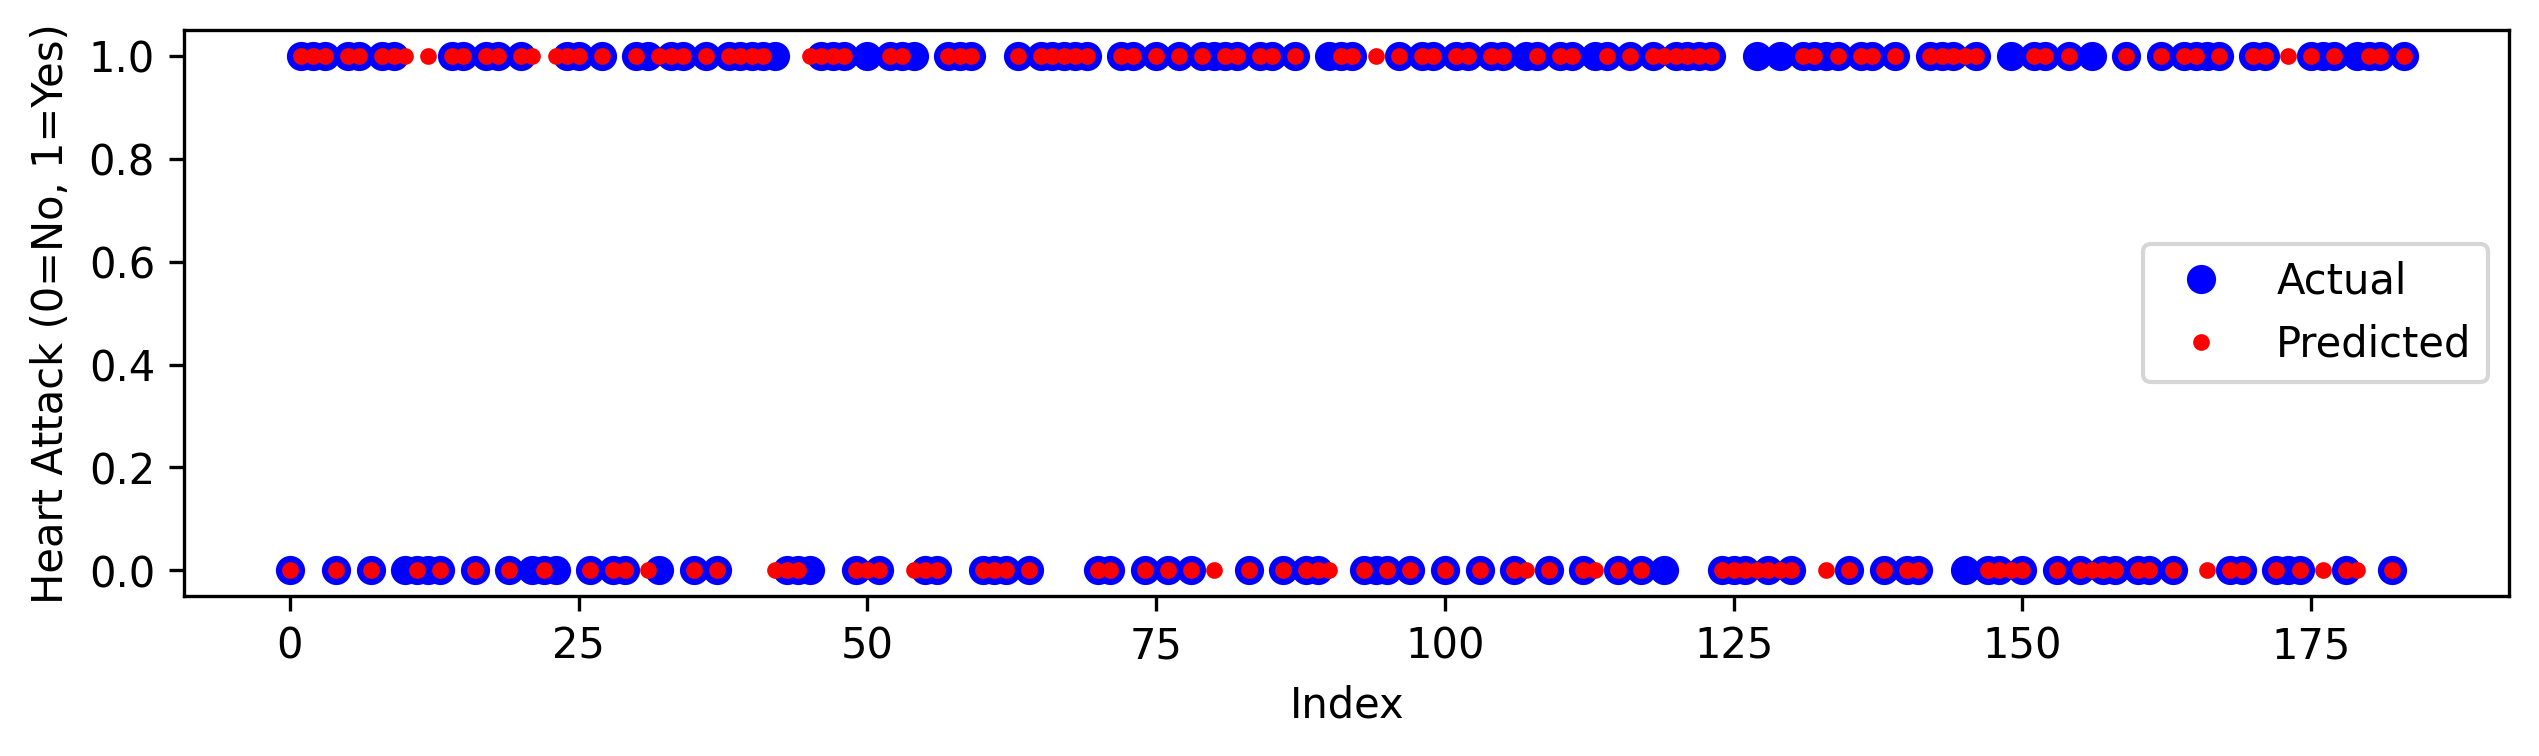

In [60]:
import matplotlib.pyplot as plt

# create x-axis data from 0 till len of y_test
x_size = range(len(y_test))

# plot actual y_test and predicted y_pred2_binary class labels
plt.figure(figsize=(10,2.5), dpi=300)
plt.plot(x_size, y_test, 'bo', label='Actual') # plot blue circles for actual class labels
plt.plot(x_size, y_pred2_binary, 'r.', label='Predicted') # plot red crosses for predicted class labels

# add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Heart Attack (0=No, 1=Yes)')
